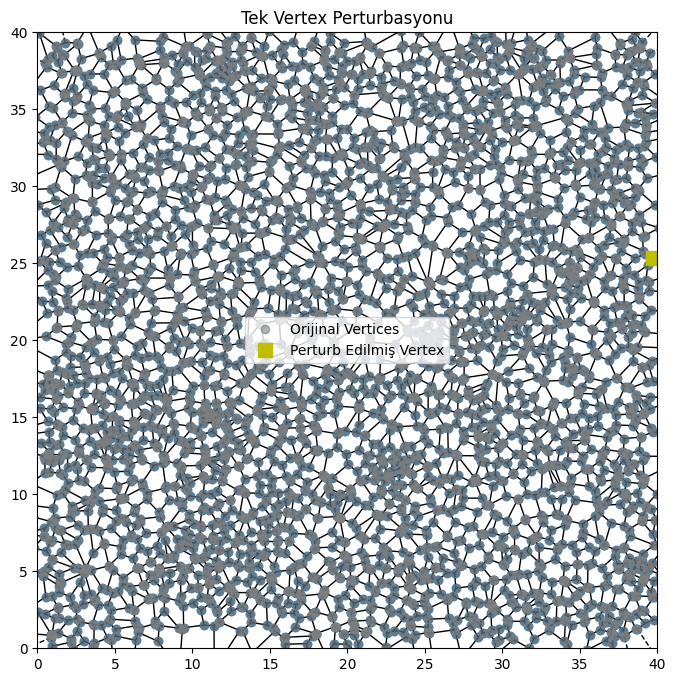

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# ---------------------------------------------------------------
# 1. Voronoi diyagramı oluştur
# ---------------------------------------------------------------
np.random.seed(0)
# 0- 40 arası rastgele 2D nokta
points = np.random.rand(2000, 2) * 40
# points = np.random.rand(1000, 2) 
vor = Voronoi(points)

# ---------------------------------------------------------------
# 2. Bir vertex seç ve perturb et
# ---------------------------------------------------------------
vertex_index = 809                  # perturb edilecek vertex indeksi
delta = np.array([0.005, 0.005])  # perturbasyon vektörü
perturbed_vertices = vor.vertices.copy()
perturbed_vertices[vertex_index] += delta

# ---------------------------------------------------------------
# 3. Çizim
# ---------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 8))

# Voronoi kenarları
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=True,)

# Orijinal vertex’ler (gri)
ax.plot(vor.vertices[:, 0], vor.vertices[:, 1], 'o', color='gray', label='Orijinal Vertices', alpha=0.6)

# Perturb edilmiş vertex (sarı kare)
ax.plot(perturbed_vertices[vertex_index, 0], perturbed_vertices[vertex_index, 1],
        'ys', markersize=10, label='Perturb Edilmiş Vertex')

# Perturbasyon yönünü gösteren ok
ax.arrow(vor.vertices[vertex_index, 0],
         vor.vertices[vertex_index, 1],
         delta[0], delta[1],
         head_width=0.015, color='orange', length_includes_head=True)

# Orijinal vertex (kırmızı daire)
# ax.plot(vor.vertices[vertex_index, 0], vor.vertices[vertex_index, 1],
#         'ro', markersize=6, label='Orijinal Vertex')

# Nokta (seed) konumları
# ax.plot(points[:, 0], points[:, 1], 'b.', label='Seeds')

# Plot the index of vertices
# for i, (x, y) in enumerate(vor.vertices):
#         ax.text(x, y, str(i), color='black',ha='right', va='bottom')

# plot the index of points whose coordinates are between 0 and 40
# for i, (x, y) in enumerate(points):
#     if 0 < x < 40 and 0 < y < 40:
#         ax.text(x, y, str(i), color='blue', fontsize=8, ha='right', va='top')

ax.legend()
ax.set_xlim(0, 40)
ax.set_ylim(0, 40)
# ax.set_aspect('equal')
ax.set_title("Tek Vertex Perturbasyonu")

# save the figure
plt.savefig('single_vertex_perturbation.png', dpi=600, bbox_inches=None)

# plt.tight_layout()
plt.show()


In [34]:
from Main_Function_perturbation import fun_vor_main_perturbation
explicit_voronoi_perturbed, vertices_perturbed, cell_centers_perturbed, distance_original_list_perturbed, distance_from_found_to_previous_perturbed = fun_vor_main_perturbation(vor, points)

from Main_Function import fun_vor_main
explicit_voronoi, vertices, cell_centers, distance_original_list, distance_from_found_to_previous = fun_vor_main(vor, points)




print(vor.point_region)
print(points)
print(cell_centers)

# RMS error of each cell center
RMS_distance = np.sqrt(np.mean(np.sum((cell_centers - points)**2, axis=1)))
# log10 the RMS distance
log10_RMS_distance = np.log10(RMS_distance)
print('log10_RMS_distance :', log10_RMS_distance)

# Perturbed RMS error of each cell center
RMS_distance_perturbed = np.sqrt(np.mean(np.sum((cell_centers_perturbed - points)**2, axis=1)))
# log10 the RMS distance
log10_RMS_distance_perturbed = np.log10(RMS_distance_perturbed)
print('log10_RMS_distance perturbed:', log10_RMS_distance_perturbed)

# find the distances of points between cell_centers and cell_centers_perturbed
distances_between_centers = np.sqrt(np.sum((cell_centers - cell_centers_perturbed)**2, axis=1))
print('distances_between_centers :', distances_between_centers)

# find centers which are affected more than 1e-5
affected_centers_indices = np.where(distances_between_centers > 1e-5)[0]
print('affected_centers_indices :', affected_centers_indices)







[1051 1088 1586 ... 1961  709  823]
[[21.95254016 28.60757465]
 [24.11053504 21.79532732]
 [16.94619197 25.83576452]
 ...
 [ 4.79615623 13.98557468]
 [17.39494517 33.20011788]
 [37.3122473  12.33353738]]
[[21.95254016 28.60757465]
 [24.11053504 21.79532732]
 [16.94619197 25.83576452]
 ...
 [ 4.79615623 13.98557468]
 [17.39494517 33.20011788]
 [37.3122473  12.33353738]]
log10_RMS_distance : -9.728248184837424
log10_RMS_distance perturbed: -4.517662884606502
distances_between_centers : [1.31450406e-13 3.03543990e-14 7.94410929e-15 ... 0.00000000e+00
 1.42108547e-14 5.15440376e-08]
affected_centers_indices : [  19   36   61   92  114  191  239  244  552  563  568  587  634  697
  752  754  813  946  953  964 1052 1084 1095 1104 1120 1125 1167 1234
 1278 1311 1325 1329 1414 1418 1446 1598 1618 1755 1778 1874]


In [35]:
# percentage of affected centers
percentage_affected = (len(affected_centers_indices) / len(cell_centers)) * 100
print('percentage_affected :', percentage_affected)

percentage_affected : 2.0


In [41]:
vertex_index = 1330

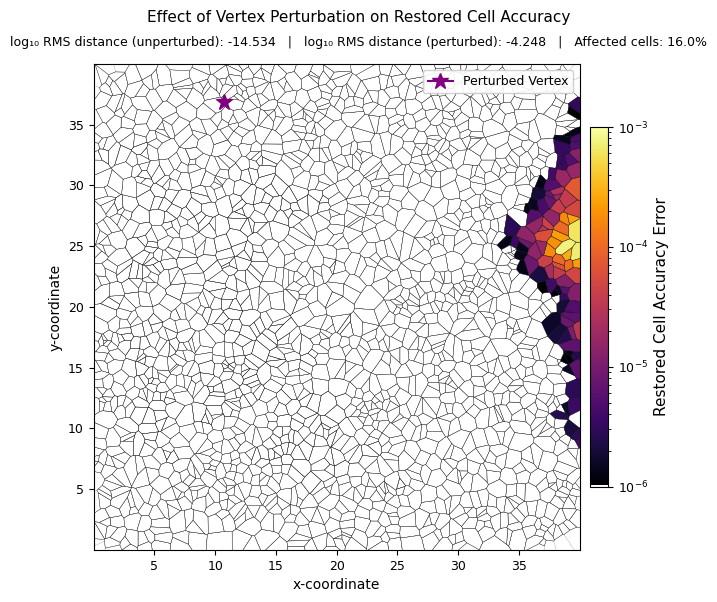

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from matplotlib.colors import LogNorm, LinearSegmentedColormap
from scipy.spatial import voronoi_plot_2d

# ---------------------------------------------------------------
# Custom colormap: white → inferno
# ---------------------------------------------------------------
base_cmap = plt.cm.inferno
colors = base_cmap(np.linspace(0, 1, 256))
colors[0] = [1, 1, 1, 1]  # make lowest values pure white
white_inferno = LinearSegmentedColormap.from_list("white_inferno", colors)

# ---------------------------------------------------------------
# Figure setup
# ---------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6.5, 6.5))

# Voronoi edges
voronoi_plot_2d(
    vor, ax=ax, show_points=False, show_vertices=False,
    line_colors='black', line_width=0.3, line_alpha=0.5
)

# ---------------------------------------------------------------
# Build colored polygons
# ---------------------------------------------------------------
patches, values = [], []
for i, region_index in enumerate(vor.point_region):
    region = vor.regions[region_index]
    if -1 in region or len(region) == 0:
        continue
    polygon = np.array([vor.vertices[j] for j in region])
    patches.append(Polygon(polygon, closed=True))
    values.append(distances_between_centers[i])

# ---------------------------------------------------------------
# PatchCollection setup
# ---------------------------------------------------------------
collection = PatchCollection(
    patches,
    cmap=white_inferno,
    norm=LogNorm(vmin=1e-6, vmax=1e-3),
    edgecolor='black',
    linewidth=0.2
)
collection.set_array(np.array(values))
ax.add_collection(collection)

# ---------------------------------------------------------------
# Colorbar
# ---------------------------------------------------------------
cbar = plt.colorbar(collection, ax=ax, fraction=0.035, pad=0.02)
cbar.set_label('Restored Cell Accuracy Error', fontsize=11)
cbar.ax.tick_params(labelsize=9)

# ---------------------------------------------------------------
# Perturbed vertex marker
# ---------------------------------------------------------------
ax.plot(
    perturbed_vertices[vertex_index, 0],
    perturbed_vertices[vertex_index, 1],
    marker='*', color='purple', markersize=12,
    label='Perturbed Vertex', zorder=5
)

# ---------------------------------------------------------------
# Axes and layout styling
# ---------------------------------------------------------------
ax.set_facecolor('white')
ax.set_xlim(vor.min_bound[0], vor.max_bound[0])
ax.set_ylim(vor.min_bound[1], vor.max_bound[1])
ax.set_aspect('equal')
ax.tick_params(labelsize=9)
ax.legend(loc='upper right', fontsize=9, frameon=True, framealpha=0.9)
ax.set_xlabel('x-coordinate', fontsize=10)
ax.set_ylabel('y-coordinate', fontsize=10)

# ---------------------------------------------------------------
# Title and subtitle section
# ---------------------------------------------------------------
main_title = 'Effect of Vertex Perturbation on Restored Cell Accuracy'
fig.text(0.5, 0.95, main_title, fontsize=11, ha='center', va='top')

log10_RMS_distance = -14.533680447438837
log10_RMS_distance_perturbed = -4.247836508213576
percentage_affected = 16.0

subtitle = (
    f"log₁₀ RMS distance (unperturbed): {log10_RMS_distance:.3f}   |   "
    f"log₁₀ RMS distance (perturbed): {log10_RMS_distance_perturbed:.3f}   |   "
    f"Affected cells: {percentage_affected:.1f}%"
)

# Place subtitle directly BELOW main title
fig.text(
    0.5, 0.91, subtitle,
    ha='center', va='top',
    fontsize=9, color='black'
)

# ---------------------------------------------------------------
# Layout and save
# ---------------------------------------------------------------
plt.tight_layout(rect=[0, 0, 1, 0.94])  # reserve space for title + subtitle
plt.show()
# plt.savefig("Voronoi_Perturbation_SubtitleBelowTitle.tiff", dpi=600, bbox_inches='tight')


In [37]:
# find the index of a vertex closest to 0.5, 0.5
distances_to_center = np.linalg.norm(vor.vertices - np.array([0.5, 0.5]), axis=1)
closest_vertex_index = np.argmin(distances_to_center)
print('closest_vertex_index :', closest_vertex_index)

closest_vertex_index : 151


In [38]:
# RMS error of each cell center
RMS_distance = np.sqrt(np.mean(np.sum((cell_centers - points)**2, axis=1)))
# log10 the RMS distance
log10_RMS_distance = np.log10(RMS_distance)
print('log10_RMS_distance :', log10_RMS_distance)

# Perturbed RMS error of each cell center
RMS_distance_perturbed = np.sqrt(np.mean(np.sum((cell_centers_perturbed - points)**2, axis=1)))
# log10 the RMS distance
log10_RMS_distance_perturbed = np.log10(RMS_distance_perturbed)
print('log10_RMS_distance perturbed:', log10_RMS_distance_perturbed)

percentage_affected = (len(affected_centers_indices) / len(cell_centers)) * 100
print('percentage_affected :', percentage_affected)

log10_RMS_distance : -9.728248184837424
log10_RMS_distance perturbed: -4.517662884606502
percentage_affected : 2.0


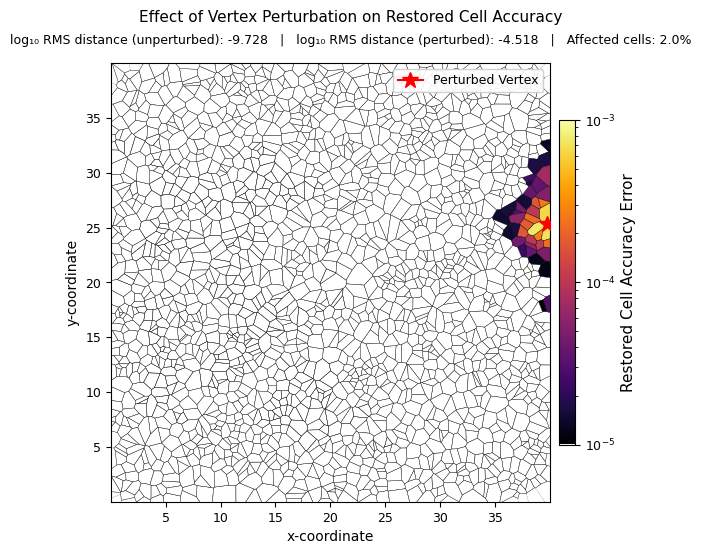

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from matplotlib.colors import LogNorm, LinearSegmentedColormap
from scipy.spatial import voronoi_plot_2d

# ---------------------------------------------------------------
# Create a custom "white-to-inferno" colormap
# ---------------------------------------------------------------
base_cmap = plt.cm.inferno
colors = base_cmap(np.linspace(0, 1, 256))
colors[0] = [1, 1, 1, 1]  # replace lowest value with white (RGBA)
white_inferno = LinearSegmentedColormap.from_list('white_inferno', colors)

# ---------------------------------------------------------------
# Plot setup
# ---------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 6))

# Draw Voronoi edges
voronoi_plot_2d(
    vor, ax=ax, show_points=False, show_vertices=False,
    line_colors='black', line_width=0.3, line_alpha=0.5
)

# ---------------------------------------------------------------
# Build colored polygons
# ---------------------------------------------------------------
patches = []
values = []

for i, region_index in enumerate(vor.point_region):
    region = vor.regions[region_index]
    if -1 in region or len(region) == 0:
        continue
    polygon = np.array([vor.vertices[j] for j in region])
    patches.append(Polygon(polygon, closed=True))
    values.append(distances_between_centers[i])

# ---------------------------------------------------------------
# Add patch collection with white-inferno colormap
# ---------------------------------------------------------------
collection = PatchCollection(
    patches,
    cmap=white_inferno,
    norm=LogNorm(vmin=1e-5, vmax=1e-3),
    edgecolor='black',
    linewidth=0.2
)
collection.set_array(np.array(values))
ax.add_collection(collection)

# ---------------------------------------------------------------
# Colorbar
# ---------------------------------------------------------------
cbar = plt.colorbar(collection, ax=ax, fraction=0.035, pad=0.02)
cbar.set_label('Restored Cell Accuracy Error', fontsize=11)
cbar.ax.tick_params(labelsize=9)

# ---------------------------------------------------------------
# Highlight perturbed vertex
# ---------------------------------------------------------------
ax.plot(
    perturbed_vertices[vertex_index, 0],
    perturbed_vertices[vertex_index, 1],
    marker='*', color='red', markersize=12,
    label='Perturbed Vertex', zorder=5
)

# ---------------------------------------------------------------
# Styling for academic paper
# ---------------------------------------------------------------
ax.set_facecolor('white')
ax.set_xlim(vor.min_bound[0], vor.max_bound[0])
ax.set_ylim(vor.min_bound[1], vor.max_bound[1])
ax.set_aspect('equal')
ax.tick_params(labelsize=9)
ax.legend(loc='upper right', fontsize=9, frameon=True, framealpha=0.9)
ax.set_xlabel('x-coordinate', fontsize=10)
ax.set_ylabel('y-coordinate', fontsize=10)
# ax.set_title('Effect of Vertex Perturbation on Restored Cell Accuracy', fontsize=11)

main_title = 'Effect of Vertex Perturbation on Restored Cell Accuracy'
fig.text(0.5, 0.95, main_title, fontsize=11, ha='center', va='top')

# log10_RMS_distance = -14.533680447438837
# log10_RMS_distance_perturbed = -4.247836508213576
# percentage_affected = 16.0

subtitle = (
    f"log₁₀ RMS distance (unperturbed): {log10_RMS_distance:.3f}   |   "
    f"log₁₀ RMS distance (perturbed): {log10_RMS_distance_perturbed:.3f}   |   "
    f"Affected cells: {percentage_affected:.1f}%"
)

# Place subtitle directly BELOW main title
fig.text(
    0.5, 0.91, subtitle,
    ha='center', va='top',
    fontsize=9, color='black'
)




plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig("Voronoi_Perturbation.png", dpi=600, bbox_inches='tight')
plt.show()

# save figure


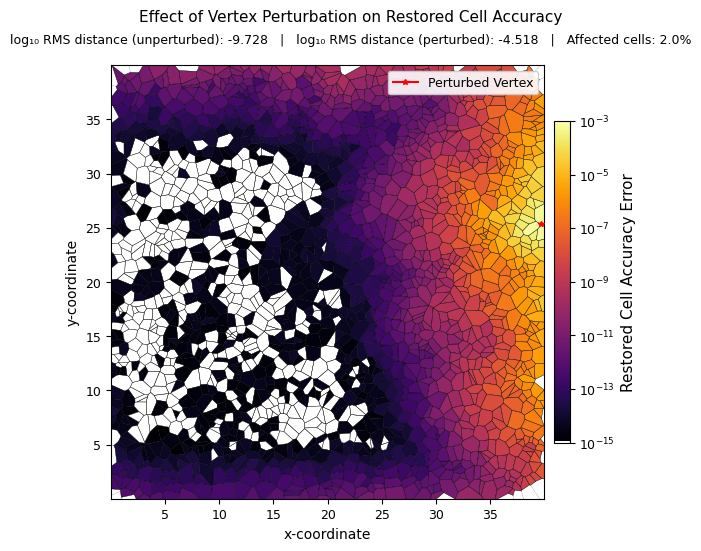

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from matplotlib.colors import LogNorm, LinearSegmentedColormap
from scipy.spatial import voronoi_plot_2d

# ---------------------------------------------------------------
# Create a custom "white-to-inferno" colormap
# ---------------------------------------------------------------
base_cmap = plt.cm.inferno
colors = base_cmap(np.linspace(0, 1, 256))
colors[0] = [1, 1, 1, 1]  # replace lowest value with white (RGBA)
white_inferno = LinearSegmentedColormap.from_list('white_inferno', colors)

# ---------------------------------------------------------------
# Plot setup
# ---------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 6))

# Draw Voronoi edges
voronoi_plot_2d(
    vor, ax=ax, show_points=False, show_vertices=False,
    line_colors='black', line_width=0.3, line_alpha=0.5
)

# ---------------------------------------------------------------
# Build colored polygons
# ---------------------------------------------------------------
patches = []
values = []

for i, region_index in enumerate(vor.point_region):
    region = vor.regions[region_index]
    if -1 in region or len(region) == 0:
        continue
    polygon = np.array([vor.vertices[j] for j in region])
    patches.append(Polygon(polygon, closed=True))
    values.append(distances_between_centers[i])

# ---------------------------------------------------------------
# Add patch collection with white-inferno colormap
# ---------------------------------------------------------------
collection = PatchCollection(
    patches,
    cmap=white_inferno,
    norm=LogNorm(vmin=1e-15, vmax=1e-3),
    edgecolor='black',
    linewidth=0.2
)
collection.set_array(np.array(values))
ax.add_collection(collection)

# ---------------------------------------------------------------
# Colorbar
# ---------------------------------------------------------------
cbar = plt.colorbar(collection, ax=ax, fraction=0.035, pad=0.02)
cbar.set_label('Restored Cell Accuracy Error', fontsize=11)
cbar.ax.tick_params(labelsize=9)

# ---------------------------------------------------------------
# Highlight perturbed vertex
# ---------------------------------------------------------------
ax.plot(
    perturbed_vertices[vertex_index, 0],
    perturbed_vertices[vertex_index, 1],
    marker='*', color='red', markersize=4,
    label='Perturbed Vertex', zorder=5
)

# ---------------------------------------------------------------
# Styling for academic paper
# ---------------------------------------------------------------
ax.set_facecolor('white')
ax.set_xlim(vor.min_bound[0], vor.max_bound[0])
ax.set_ylim(vor.min_bound[1], vor.max_bound[1])
ax.set_aspect('equal')
ax.tick_params(labelsize=9)
ax.legend(loc='upper right', fontsize=9, frameon=True, framealpha=0.9)
ax.set_xlabel('x-coordinate', fontsize=10)
ax.set_ylabel('y-coordinate', fontsize=10)
# ax.set_title('Effect of Vertex Perturbation on Restored Cell Accuracy', fontsize=11)

main_title = 'Effect of Vertex Perturbation on Restored Cell Accuracy'
fig.text(0.5, 0.95, main_title, fontsize=11, ha='center', va='top')

# log10_RMS_distance = -14.533680447438837
# log10_RMS_distance_perturbed = -4.247836508213576
# percentage_affected = 16.0

subtitle = (
    f"log₁₀ RMS distance (unperturbed): {log10_RMS_distance:.3f}   |   "
    f"log₁₀ RMS distance (perturbed): {log10_RMS_distance_perturbed:.3f}   |   "
    f"Affected cells: {percentage_affected:.1f}%"
)

# Place subtitle directly BELOW main title
fig.text(
    0.5, 0.91, subtitle,
    ha='center', va='top',
    fontsize=9, color='black'
)




plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig("Voronoi_Perturbation.png", dpi=600, bbox_inches='tight')
plt.show()

# save figure
